In [1]:
from qiskit import QuantumCircuit

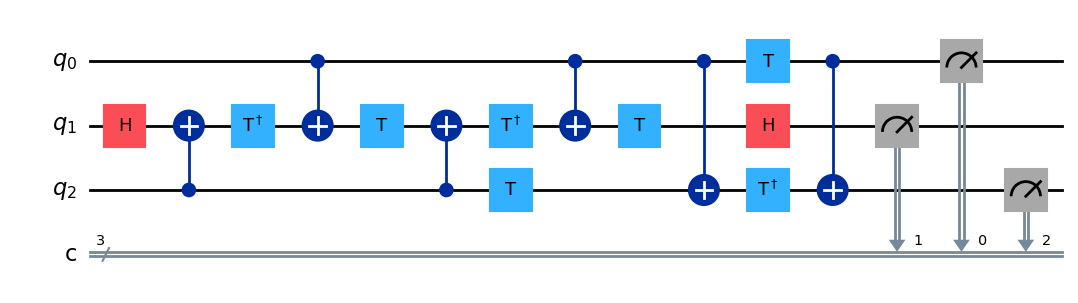

In [11]:
qc=QuantumCircuit(3,3)
qc.ccx(0,2,1)
qc.measure(0,0)
qc.measure(1,1)
qc.measure(2,2)
qc.decompose().draw('mpl')

In [48]:
#qubit-reuse in aersimulator

In [28]:
from qiskit import transpile
from qiskit_aer import AerSimulator

In [29]:
transpiled_qc = transpile(qc.decompose(), backend=AerSimulator(), init_method="qubit_reuse")

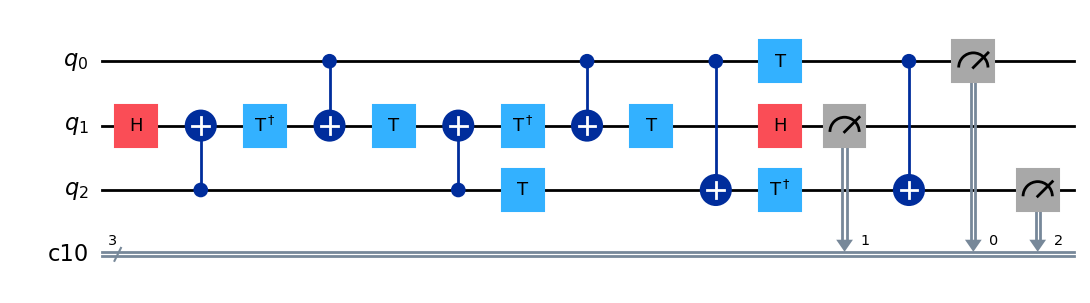

In [30]:
transpiled_qc.draw('mpl')

In [49]:
#qubit-reuse in genericbackend

In [50]:
from qiskit.providers.fake_provider import GenericBackendV2

In [51]:
transpiled_qc1 = transpile(qc.decompose(), backend=GenericBackendV2(num_qubits=3), init_method="qubit_reuse")

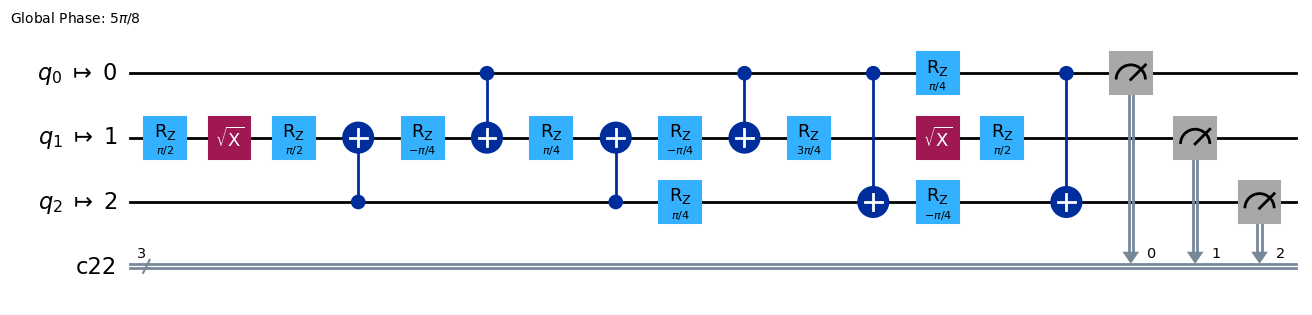

In [52]:
transpiled_qc1.draw('mpl')

In [53]:
#qubit-reuse in actual hardware

In [55]:
#checking backends available
from qiskit_ibm_runtime import QiskitRuntimeService

service = QiskitRuntimeService(instance="ibm-q/open/main")
 
service.backends()

[<IBMBackend('ibm_brisbane')>,
 <IBMBackend('ibm_kyoto')>,
 <IBMBackend('ibm_osaka')>,
 <IBMBackend('ibm_sherbrooke')>]

In [70]:
#checking the transpiled circuit in hardware

from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import QiskitRuntimeService

backend_name = "ibm_sherbrooke"
service = QiskitRuntimeService()
backend = service.get_backend(backend_name)
pm = generate_preset_pass_manager(optimization_level=1, backend=backend) 

transpiled_qc2= pm.run(qc.decompose())

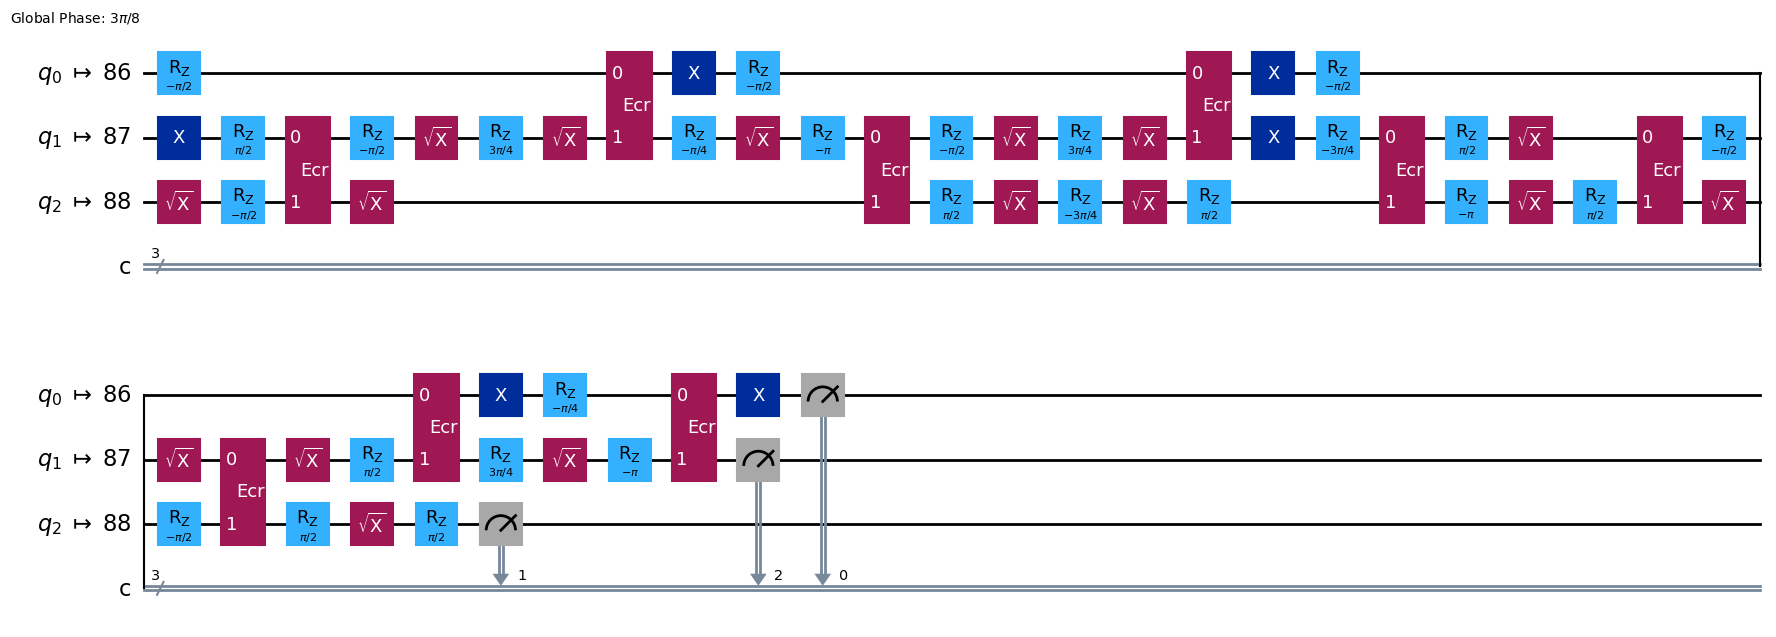

In [75]:
transpiled_qc2.draw('mpl', idle_wires=False)

In [76]:
#transpiled ciruit in hardware using qubit-reuse

from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit import transpile

backend_name = "ibm_sherbrooke"
service = QiskitRuntimeService()
backend = service.get_backend(backend_name)

transpiled_qc3= transpile(qc.decompose(), backend, init_method="qubit_reuse")

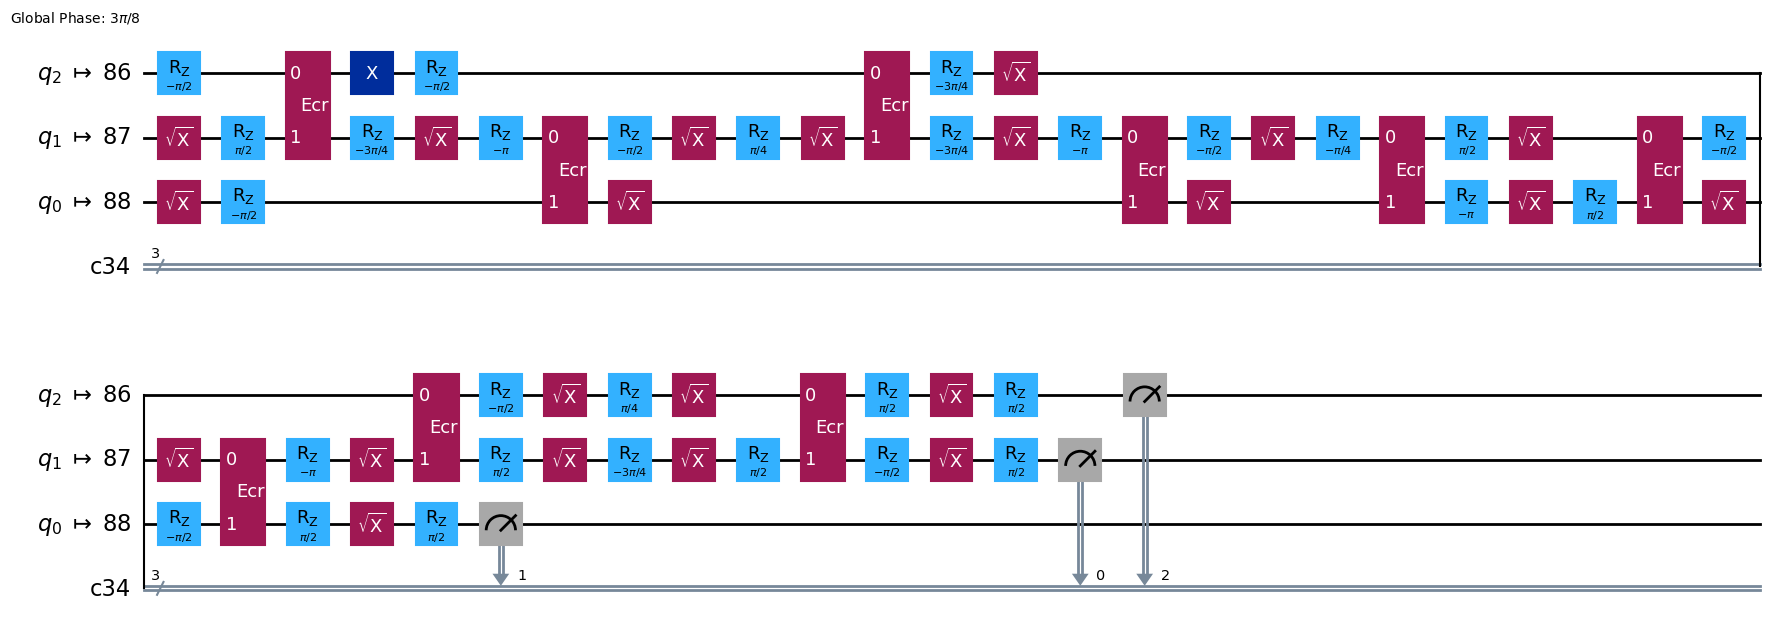

In [78]:
transpiled_qc3.draw('mpl', idle_wires=False)